# EDA

In [1]:
import numpy as np #import libraries
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline 
#matplotlib to render plots in the notebook

In [3]:
# Loading the dataset

df=pd.read_csv('Cardiotocographic.csv')
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [4]:
# Finding missing values

df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [5]:
df.info() #Finding the datatype of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [6]:
df.head(5) #All are numerical and no categorical data. Hence median can be taken as average for imputation of missing values

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [7]:
# Columns LB, AC, DS, DP, MLTV, Width, Tendency and NSP were having missing values. Let's calculate the median of all columns
# together.

median_values = df[['LB','AC', 'DS','DP','MLTV','Width','Tendency','NSP']].median()
print (median_values)



LB          133.000000
AC            0.001634
DS            0.000000
DP            0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000
dtype: float64


In [8]:
# Filling the null values with medians. Filling all columns in one go.

# data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(median)

df[['LB','AC','DS','DP','MLTV','Width','Tendency','NSP']]=df[['LB','AC','DS','DP','MLTV','Width','Tendency','NSP']].fillna(median_values)


In [9]:
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [10]:
# Rechecking if there are null values in the updated dataframe

df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [11]:
# All null values have been filled with median values. Imputation technique is considered better than deletion as the latter
# can lead to data loss.

# Since all numerical values are stored as float type no data inconsistencies were found.

In [12]:
# Finding statistical summary in order to treat outliers

df.describe()

LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.340204     0.003204     0.009894     0.004391     0.001895   
std      11.214379     0.004373     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000002     0.000173    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2126.000000  2126.000000  2126.000000  2126.000000  
mean      8.276147    70.395387     0.313246     1.301499  
std       7.734851    42.720508     0.643186     0.642133  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.000000     0.000000     1.000000  
75%      10.800000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

In [13]:
# The '50%'' value indicates the median of the column and 'mean' represents the mean of the column.
# If the median and mean are equal or almost equal then that means there are no outliers.
# Also if the difference between the 75% and max value differs hugely then that means there could be presence of outliers.

# From the abpve statistical information, it can be inferred that column 'ALTV' has a huge difference
# in between the mean and median and also the 75% and max values are also differing largely. Therefore there
# could be presence of outliers and should be treated.

# Apart from that the column 'Width' also has a huge difference between the 75% and max value and has greatly differing median
# and mean. There could be chances of outliers.

# The standard deviation also helps in understanding if there is a big difference between the values within the columns.

# Inorder, to confirm the presence of outliers, a box plots can be generated.

In [14]:
# Plotting boxplots to check for outlier presence

# Extracting outliers


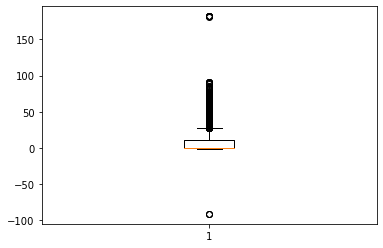

In [15]:
# data_box=data_cleaned3.dropna()
data_box=df.ALTV
b=plt.boxplot(data_box)

#Extracting outliers
# outb=plt.boxplot(df['ALTV'].dropna())

<!-- Treating of outliers -->

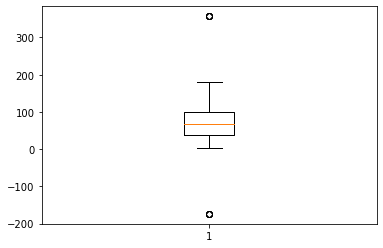

In [16]:
data_box=df.Width #Checking outliers for column 'Width'
b=plt.boxplot(data_box)

In [17]:
# Creating boxplot for all the columns using seaborn for visually appealing results

In [18]:
# In seaborn, first the dataframe is melted to reshape into long format, then pass the reshaped dataframe into sns.boxplot()

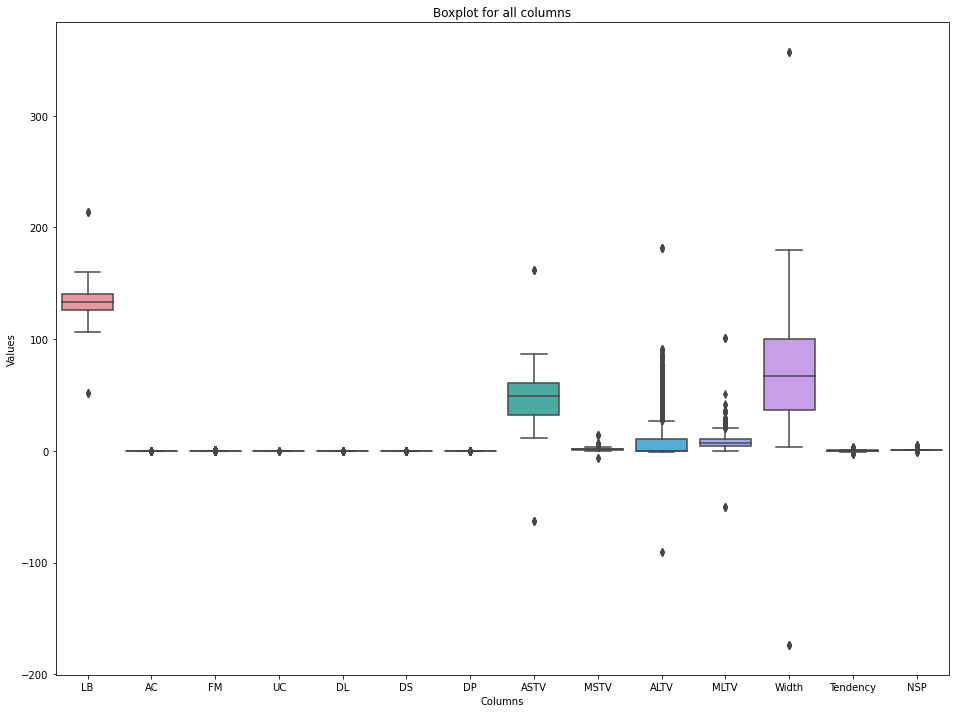

In [19]:
df_melted = df.melt(var_name='Columns', value_name='Values')


# Create the boxplot

plt.figure(figsize=(16,12))
sns.boxplot(x='Columns',y='Values', data=df_melted)
plt.title('Boxplot for all columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [20]:
# From the boxplots it is visible that the columns LB, ASTV, ALTV, MSTV, MLTV and Width have outliers. 

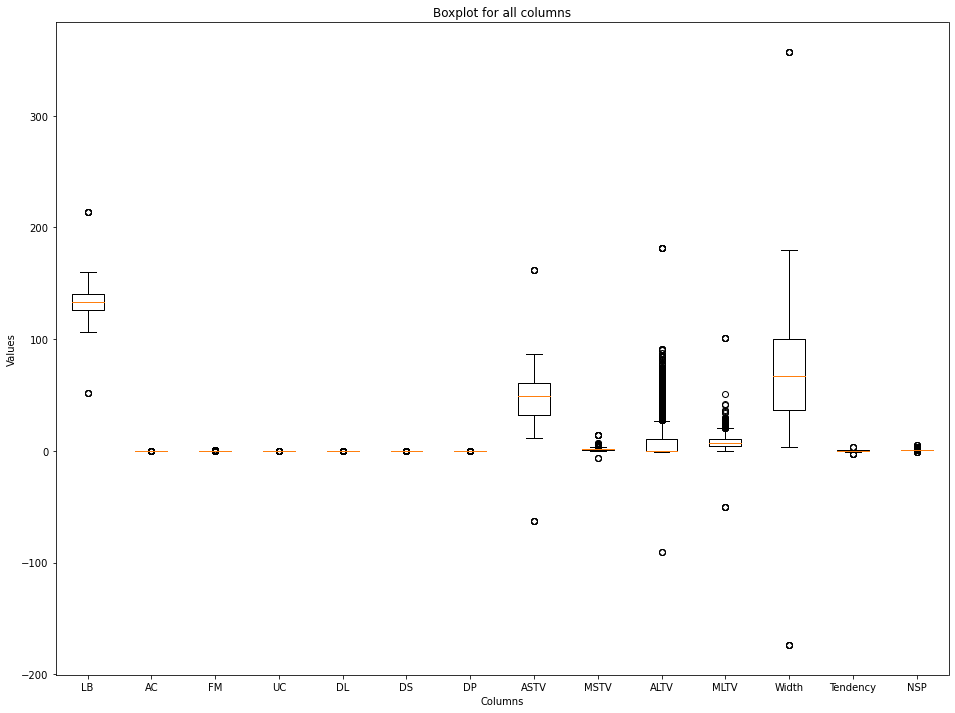

In [21]:
plt.figure(figsize=(16,12)) #Doing the same with matplotlib. As per the below diagram MSTV also has outliers.
plt.boxplot([df[col] for col in df.columns], labels=df.columns)
plt.title("Boxplot for all columns")
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [22]:
# Removing outliers and replacing with medians



def remove_outliers_with_median(df, selected_columns):
    df_cleaned=df.copy()
    for col in selected_columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1 #Interquartile range
        
        
#         Range of whiskers
        lower_bound=Q1-1.5*IQR 
        upper_bound=Q3+1.5*IQR
        
#         Replace outliers with median
        median_value=df[col].median()
        df_cleaned[col]=df[col].apply(lambda x: median_value if x<lower_bound or x>upper_bound else x)
        
    return (df_cleaned)
        
selected_columns = ['LB', 'ASTV', 'ALTV', 'MSTV', 'MLTV', 'Width']
df_cleaned = remove_outliers_with_median(df, selected_columns)

        
        
        
    


In [23]:
df_cleaned

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV  ALTV  MLTV  Width  Tendency       NSP  
0      0.5   0.0   2.4   64.0  0.999926  2.000000  
1      2.1   0.0  10.4  130.0  0.000000  1.000000  
2      2.1   0.0  13.4  130.0  0.000000  1.000000  
3      2.4   0.0   7.4  117.0  1.000000  1.000000  
4      2.4   0.0  19.9  117.0  1.000000  1.000000  
...    ...   ...   ...    ...       ...       ...  
2121   0.2  25.0   7.2   40.0  0.000000  2.000000  
2122   0.4  22.0   7.1   66.0  1.000000  2.000000  
2123   0.4  20.0   6.1   67.0  1.000000  1.990464  
2124   0.4  27.0   7.0   66.0  1.000000  2.000000  
2125   0.4   0.0   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

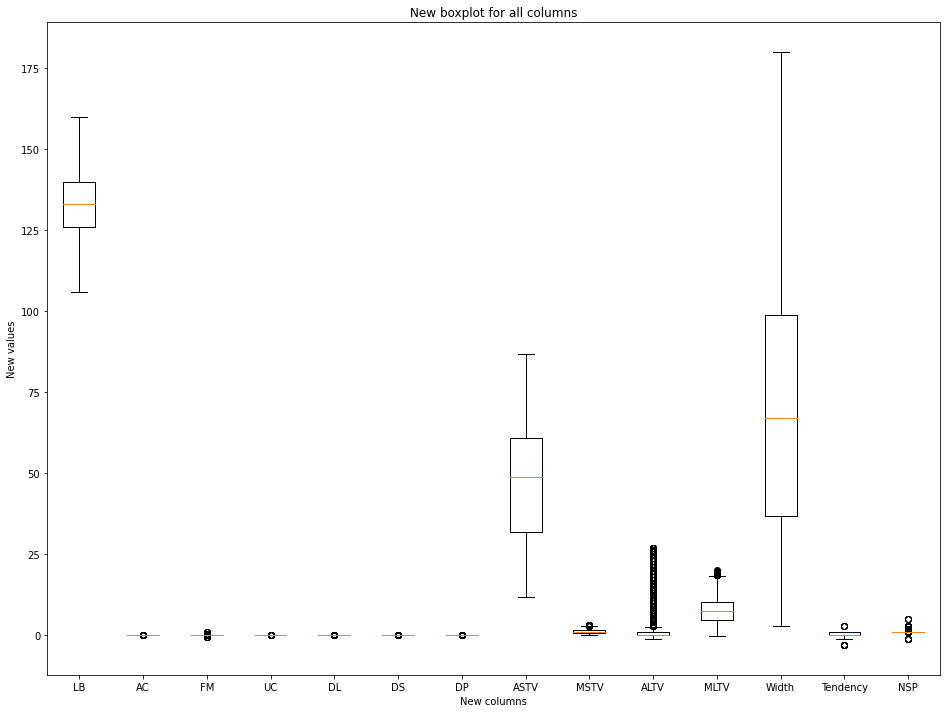

In [24]:
plt.figure(figsize=(16,12)) # Checking for outliers for the new dataframe
plt.boxplot([df_cleaned[col] for col in df_cleaned.columns], labels=df_cleaned.columns)
plt.title("New boxplot for all columns")
plt.xlabel('New columns')
plt.ylabel('New values')
plt.show()

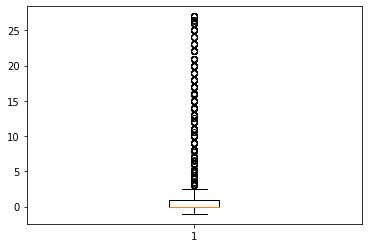

In [25]:
data_box_new=df_cleaned.ALTV # Rechecking outlier removal of column 'ALTV' in the new dataframe.
b=plt.boxplot(data_box_new)

In [26]:

# Hence outlier treatment has been completed and confirmed by plot diagrams

In [27]:
# Drawing histograms of all columns

In [28]:
import math

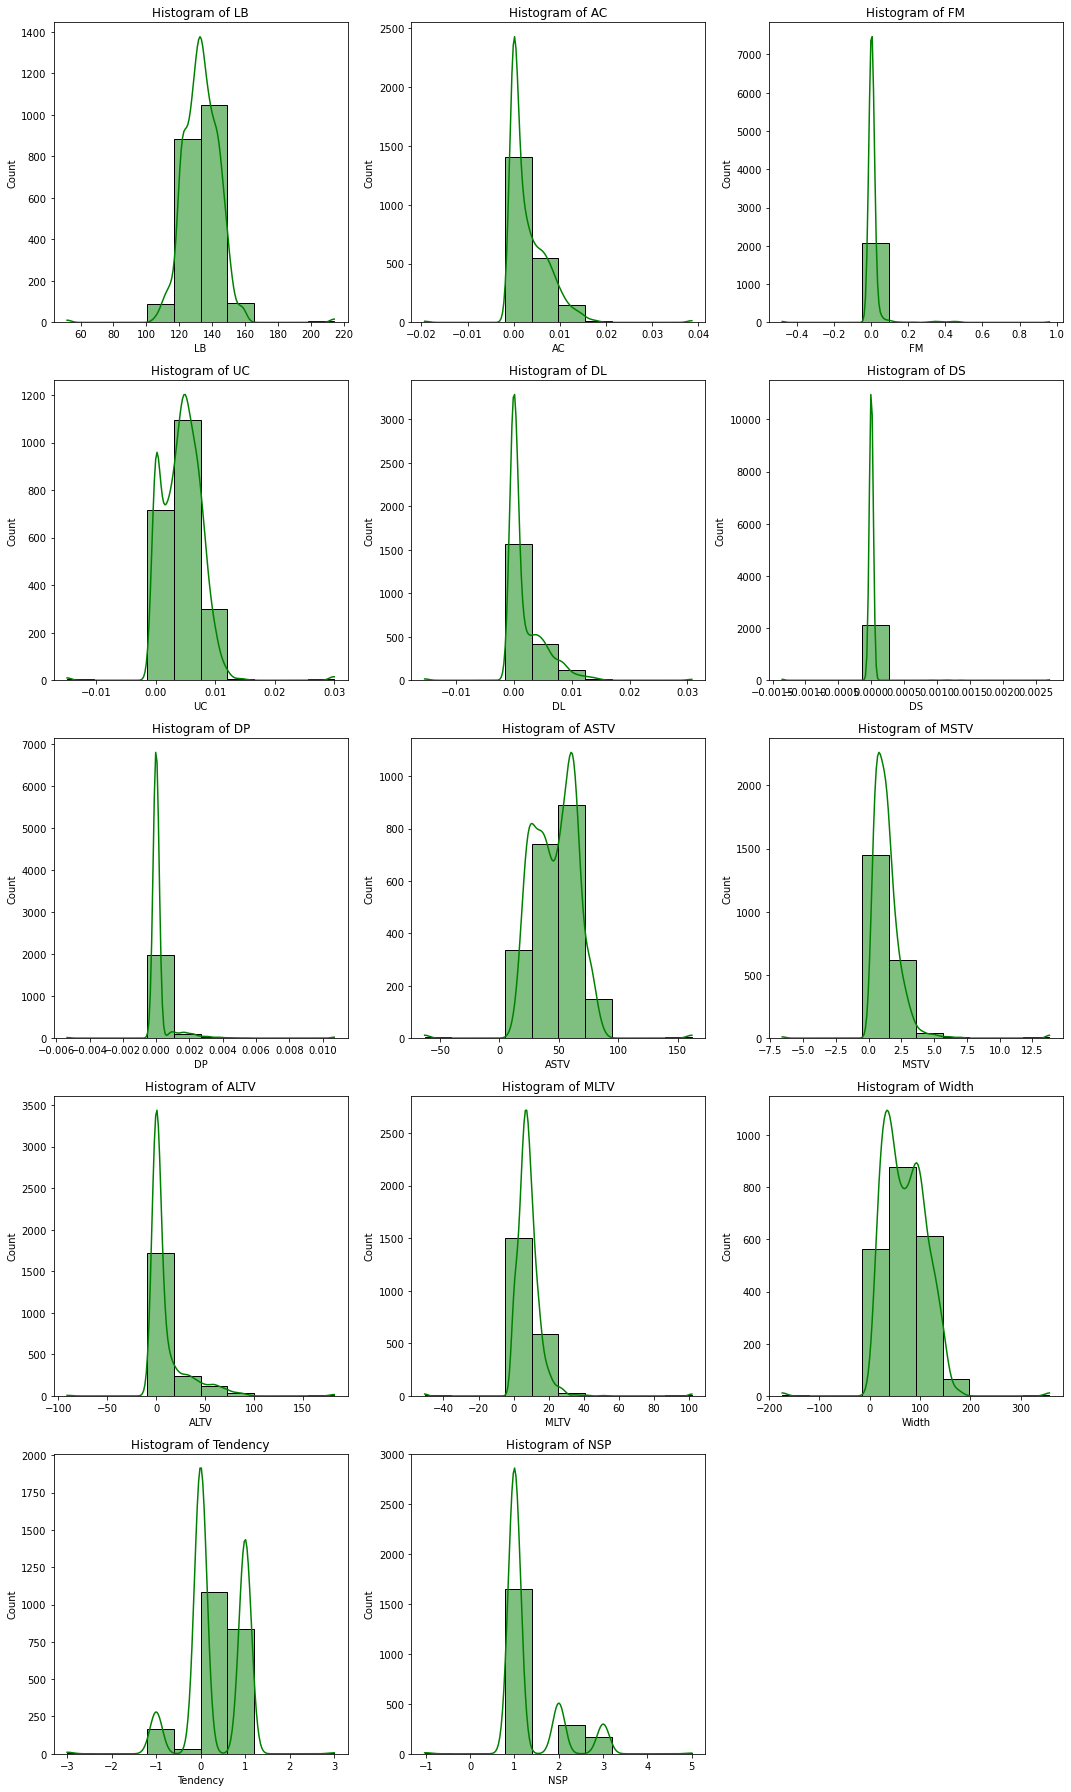

In [29]:
num_cols=len(df_cleaned.columns) # Calculating the number of columns in the dataframe
rows=math.ceil(num_cols/3) # Calculating how many rows would be needed while plotting in the subplot

plt.figure(figsize=(15,rows*5))
for i,col in enumerate(df_cleaned.columns,1):
    plt.subplot(rows,3,i)
    sns.histplot(df[col], kde=True, bins=10, color='green')
    plt.title(f'Histogram of {col}')
    
plt.tight_layout()
plt.show()
    

In [30]:
# Since there are no categorical data, there are no pie charts 

In [31]:
# Generation of scatter plots


In [32]:
# Create the default pairplot

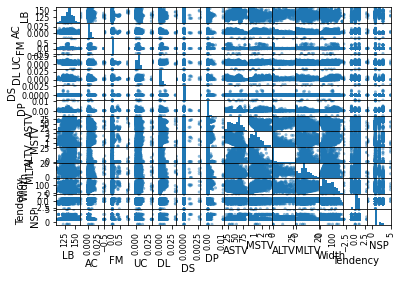

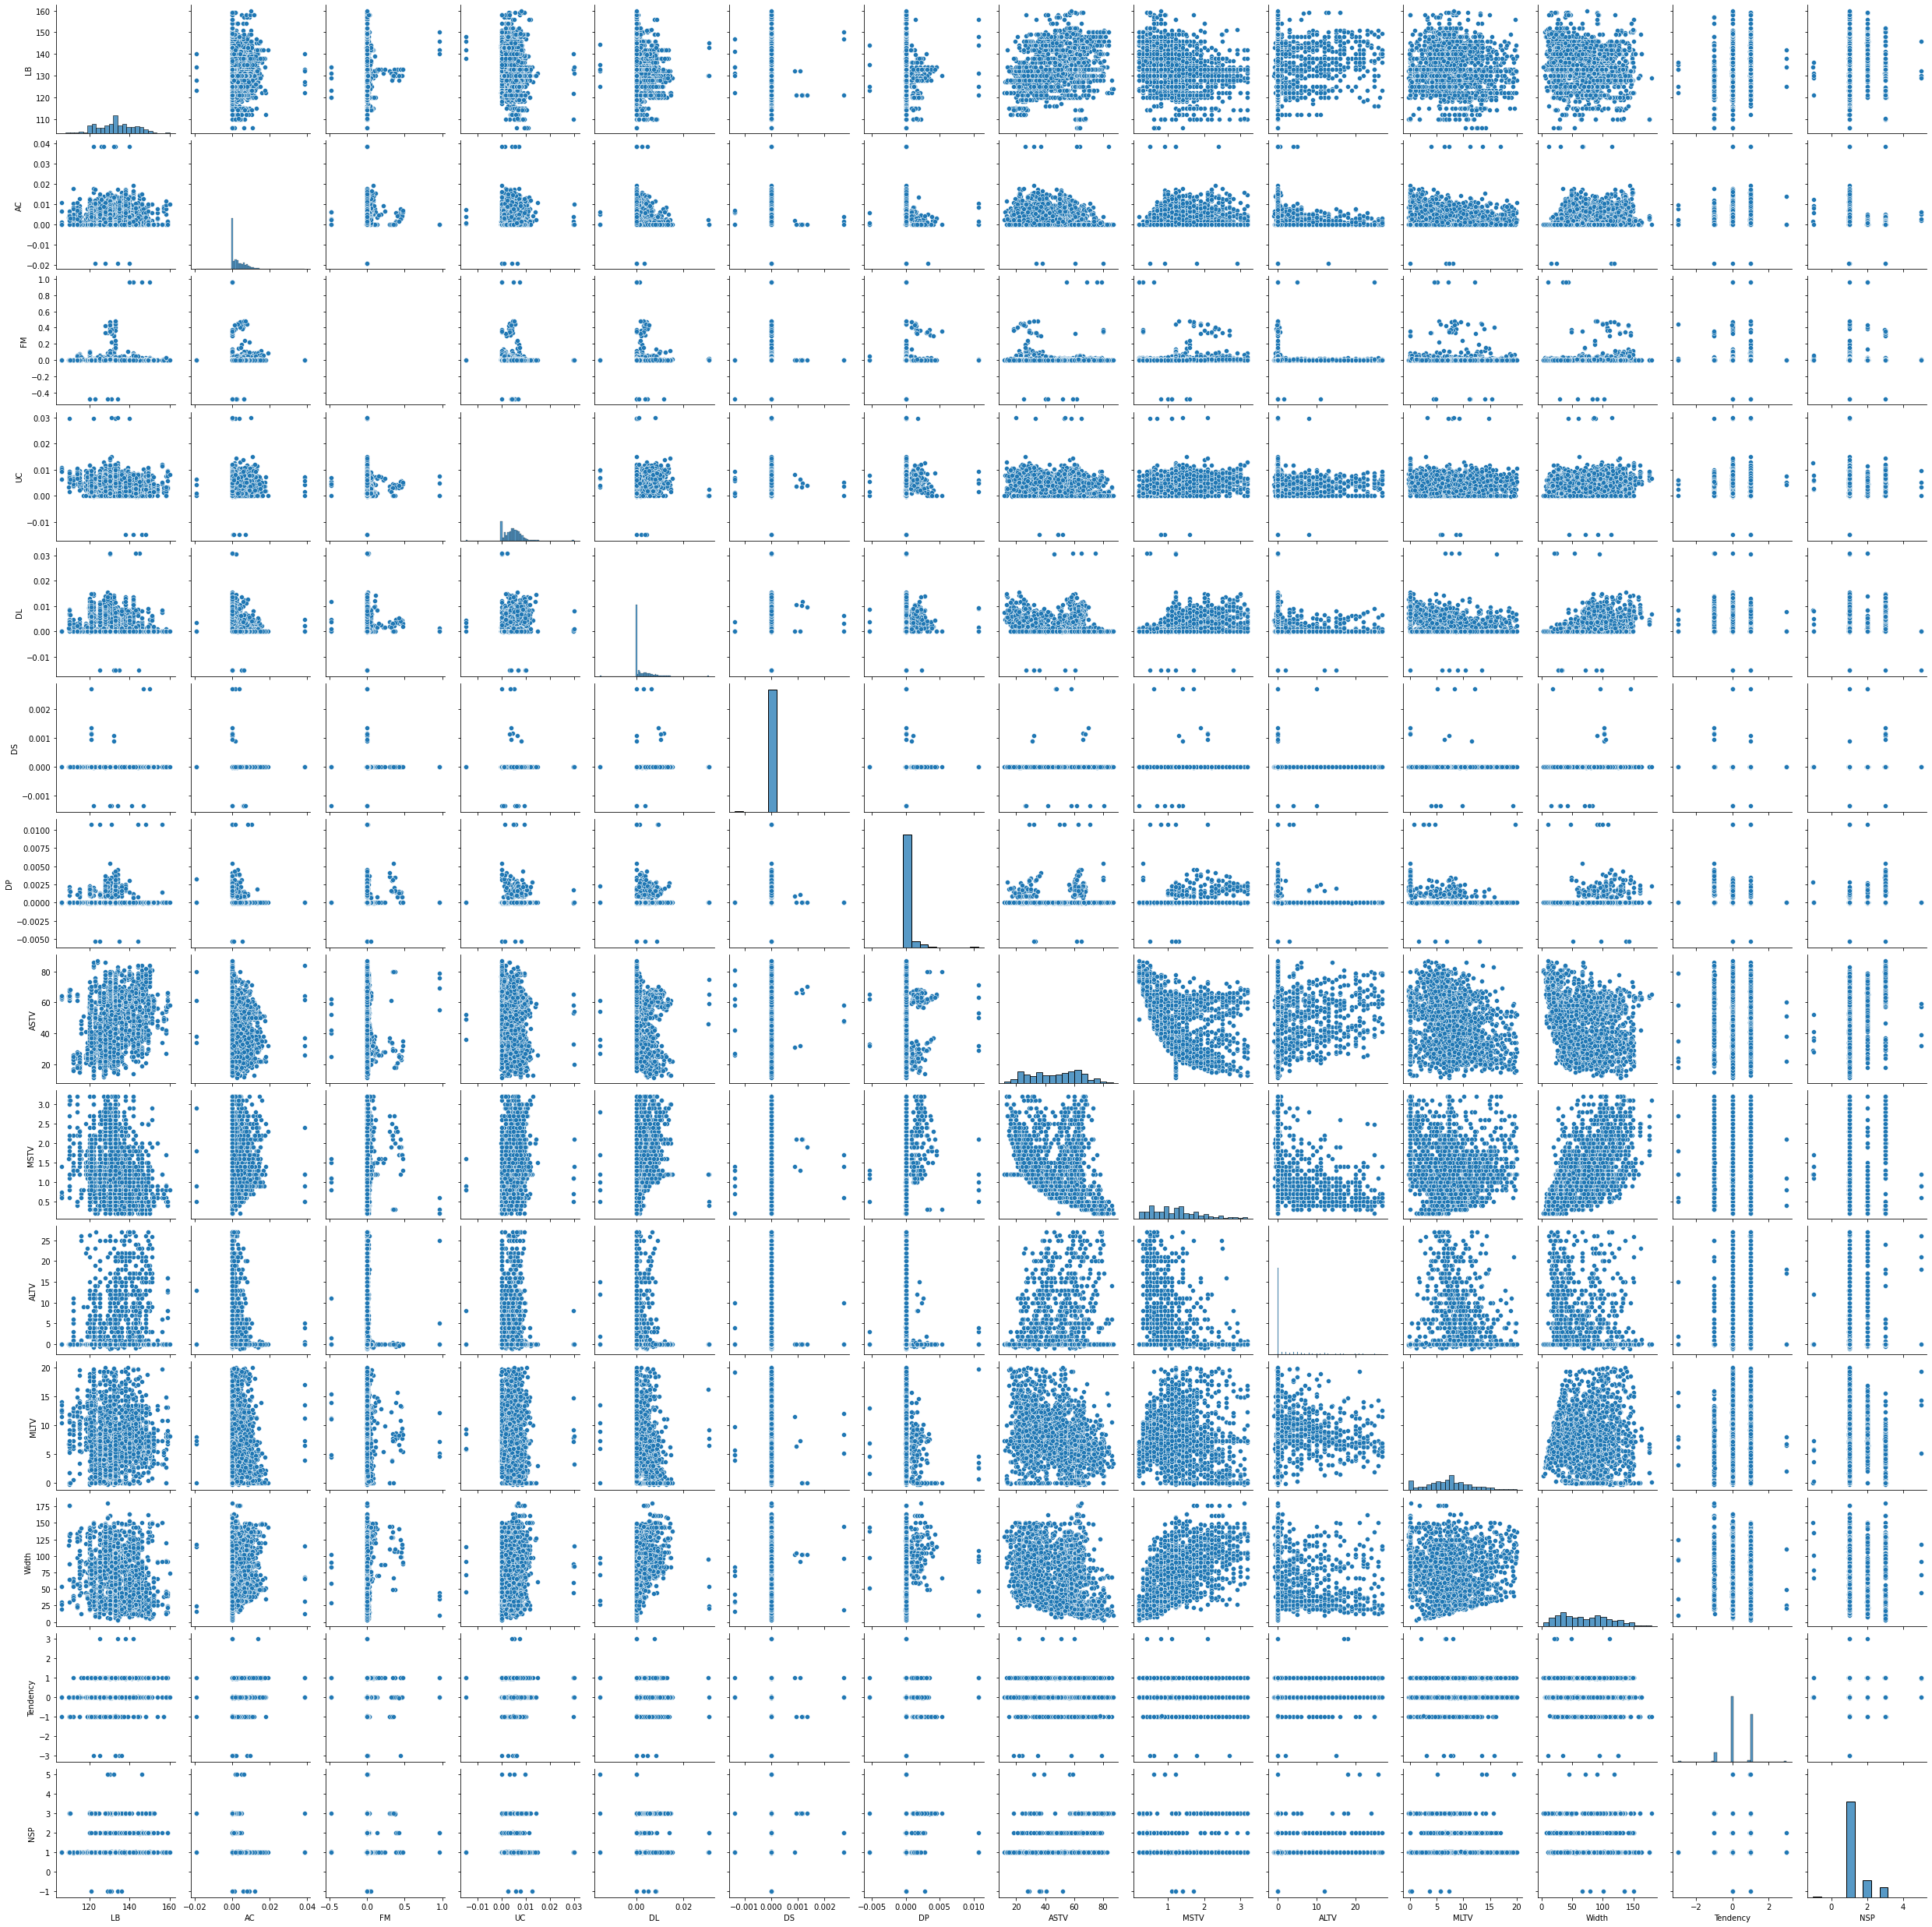

In [33]:

import seaborn as sns
pd.plotting.scatter_matrix(df_cleaned)
sns.pairplot(df_cleaned)


In [34]:
# Correlation analysis

corr_chart=df_cleaned.corr()
corr_chart

LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.079044  0.022732 -0.156549 -0.131398 -0.006091   
AC       -0.079044  1.000000  0.009768  0.071621 -0.093449 -0.033088   
FM        0.022732  0.009768  1.000000 -0.053226  0.009718  0.029916   
UC       -0.156549  0.071621 -0.053226  1.000000  0.190128 -0.006938   
DL       -0.131398 -0.093449  0.009718  0.190128  1.000000  0.058413   
DS       -0.006091 -0.033088  0.029916 -0.006938  0.058413  1.000000   
DP       -0.053208 -0.083298  0.121459  0.070295  0.144717  0.004321   
ASTV      0.304295 -0.239800 -0.036104 -0.199756 -0.085594  0.009341   
MSTV     -0.327958  0.203994  0.048595  0.275217  0.446584  0.030751   
ALTV      0.156135 -0.205953 -0.027089 -0.069316 -0.152437 -0.003348   
MLTV     -0.076952 -0.144307 -0.002758 -0.079197 -0.247396 -0.013718   
Width    -0.142775  0.251917  0.087295  0.126709  0.452790  0.045238   
Tendency  0.282346  0.031710 -0.017819 -0.066832 -0.023914 -0.015294   
NSP       0.149378 -0.311689  0.074446 -0.185229  0.024879  0.065411   

                DP      ASTV      MSTV      ALTV      MLTV     Width  \
LB       -0.053208  0.304295 -0.327958  0.156135 -0.076952 -0.142775   
AC       -0.083298 -0.239800  0.203994 -0.205953 -0.144307  0.251917   
FM        0.121459 -0.036104  0.048595 -0.027089 -0.002758  0.087295   
UC        0.070295 -0.199756  0.275217 -0.069316 -0.079197  0.126709   
DL        0.144717 -0.085594  0.446584 -0.152437 -0.247396  0.452790   
DS        0.004321  0.009341  0.030751 -0.003348 -0.013718  0.045238   
DP        1.000000  0.041827  0.202914 -0.076636 -0.187653  0.176696   
ASTV      0.041827  1.000000 -0.435276  0.136740 -0.301951 -0.255985   
MSTV      0.202914 -0.435276  1.000000 -0.268885 -0.098775  0.618593   
ALTV     -0.076636  0.136740 -0.268885  1.000000  0.079393 -0.166706   
MLTV     -0.187653 -0.301951 -0.098775  0.079393  1.000000 -0.014531   
Width     0.176696 -0.255985  0.618593 -0.166706 -0.014531  1.000000   
Tendency -0.129204 -0.002284 -0.051484  0.062251  0.096415  0.105471   
NSP       0.295057  0.456811 -0.126494  0.059534 -0.201683 -0.074516   

          Tendency       NSP  
LB        0.282346  0.149378  
AC        0.031710 -0.311689  
FM       -0.017819  0.074446  
UC       -0.066832 -0.185229  
DL       -0.023914  0.024879  
DS       -0.015294  0.065411  
DP       -0.129204  0.295057  
ASTV     -0.002284  0.456811  
MSTV     -0.051484 -0.126494  
ALTV      0.062251  0.059534  
MLTV      0.096415 -0.201683  
Width     0.105471 -0.074516  
Tendency  1.000000 -0.103713  
NSP      -0.103713  1.000000

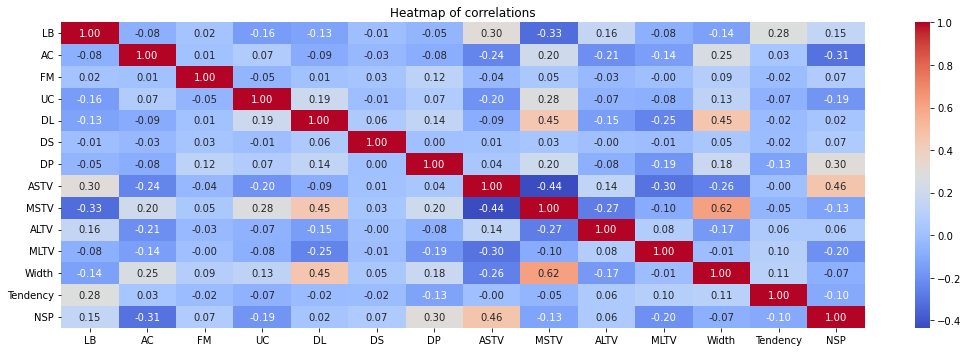

In [35]:
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.heatmap(corr_chart, annot=True, cmap='coolwarm', fmt='.2f')
plt.title ('Heatmap of correlations')
plt.tight_layout()
plt.show()

In [36]:
# Inference - There is a moderate positive correlation between the columns ' MSTV' and 'Width'.

# Since there are no categorical variables, transformation was not performed.

# Checking for duplicates

df_cleaned[df_cleaned.duplicated()]

LB        AC   FM        UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
1115  122.0  0.000000  0.0  0.000000  0.0  0.0  0.0  19.0   1.9   0.0  15.1   
1458  148.0  0.004717  0.0  0.002358  0.0  0.0  0.0  40.0   0.9   0.0  10.6   

      Width  Tendency  NSP  
1115   39.0       0.0  1.0  
1458   35.0       0.0  1.0

In [37]:
df_cleaned.shape


(2126, 14)

In [38]:
df_cleaned.drop_duplicates().shape

(2124, 14)

In [39]:
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.shape

(2124, 14)

In [40]:
# Since outliers are removed, performing normalization

In [41]:
df_cleaned

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV  ALTV  MLTV  Width  Tendency       NSP  
0      0.5   0.0   2.4   64.0  0.999926  2.000000  
1      2.1   0.0  10.4  130.0  0.000000  1.000000  
2      2.1   0.0  13.4  130.0  0.000000  1.000000  
3      2.4   0.0   7.4  117.0  1.000000  1.000000  
4      2.4   0.0  19.9  117.0  1.000000  1.000000  
...    ...   ...   ...    ...       ...       ...  
2121   0.2  25.0   7.2   40.0  0.000000  2.000000  
2122   0.4  22.0   7.1   66.0  1.000000  2.000000  
2123   0.4  20.0   6.1   67.0  1.000000  1.990464  
2124   0.4  27.0   7.0   66.0  1.000000  2.000000  
2125   0.4   0.0   5.0   42.0  0.000000  1.000000  

[2124 rows x 14 columns]

In [44]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [42]:
df_cleaned.values

array([[ 1.20000000e+02,  0.00000000e+00,  0.00000000e+00, ...,
         6.40000000e+01,  9.99926014e-01,  2.00000000e+00],
       [ 1.32000000e+02,  6.37958500e-03,  0.00000000e+00, ...,
         1.30000000e+02,  0.00000000e+00,  1.00000000e+00],
       [ 1.33000000e+02,  3.32225900e-03,  0.00000000e+00, ...,
         1.30000000e+02,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.40000000e+02,  9.80392000e-04,  0.00000000e+00, ...,
         6.70000000e+01,  1.00000000e+00,  1.99046401e+00],
       [ 1.40000000e+02,  6.78887000e-04,  0.00000000e+00, ...,
         6.60000000e+01,  1.00000000e+00,  2.00000000e+00],
       [ 1.42000000e+02,  1.61550900e-03, -1.87572000e-04, ...,
         4.20000000e+01,  0.00000000e+00,  1.00000000e+00]])

In [45]:
d_value = df_cleaned.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(d_value)

# Transformed data

set_printoptions(precision=3)
print (rescaledX[0:5,:]) # First 5 rows and all columns of the normalized data will be printed

[[0.259 0.333 0.333 0.332 0.333 0.333 0.333 0.814 0.1   0.037 0.128 0.345
  0.667 0.502]
 [0.481 0.444 0.333 0.474 0.403 0.333 0.333 0.069 0.633 0.037 0.524 0.718
  0.5   0.336]
 [0.5   0.391 0.333 0.517 0.405 0.333 0.333 0.056 0.633 0.037 0.672 0.718
  0.5   0.336]
 [0.519 0.378 0.333 0.505 0.389 0.333 0.333 0.056 0.733 0.037 0.376 0.644
  0.667 0.336]
 [0.481 0.446 0.333 0.513 0.333 0.333 0.333 0.056 0.733 0.037 0.993 0.644
  0.667 0.336]]


In [46]:
rescaledX

array([[0.259, 0.333, 0.333, ..., 0.345, 0.667, 0.502],
       [0.481, 0.444, 0.333, ..., 0.718, 0.5  , 0.336],
       [0.5  , 0.391, 0.333, ..., 0.718, 0.5  , 0.336],
       ...,
       [0.63 , 0.35 , 0.333, ..., 0.362, 0.667, 0.501],
       [0.63 , 0.345, 0.333, ..., 0.356, 0.667, 0.502],
       [0.667, 0.361, 0.333, ..., 0.22 , 0.5  , 0.336]])

In [49]:
df_normalized= pd.DataFrame(rescaledX, columns= df_cleaned.columns, index=df_cleaned.index)


In [58]:
print ('Normalized dataframe\n')
df_normalized

Normalized dataframe



LB        AC        FM        UC        DL        DS        DP  \
0     0.259259  0.333333  0.333333  0.332212  0.333461  0.333333  0.333333   
1     0.481481  0.443609  0.333333  0.474211  0.402560  0.333333  0.333333   
2     0.500000  0.390761  0.333333  0.517081  0.405430  0.333333  0.333333   
3     0.518519  0.377599  0.333333  0.504533  0.388935  0.333333  0.333333   
4     0.480523  0.445944  0.333333  0.513468  0.333461  0.333333  0.333333   
...        ...       ...       ...       ...       ...       ...       ...   
2121  0.629630  0.333333  1.000000  0.497496  0.333461  0.333333  0.333333   
2122  0.629630  0.346723  0.333333  0.487558  0.333461  0.333333  0.333333   
2123  0.629630  0.350280  0.333333  0.484965  0.333461  0.333333  0.333333   
2124  0.629630  0.345068  0.333333  0.468210  0.333461  0.333333  0.333333   
2125  0.666667  0.361259  0.333203  0.512004  0.333461  0.333333  0.333333   

          ASTV      MSTV      ALTV      MLTV     Width  Tendency       NSP  
0     0.813830  0.100000  0.037214  0.128490  0.344633  0.666654  0.502156  
1     0.069151  0.633333  0.037214  0.523725  0.717514  0.500000  0.336208  
2     0.055853  0.633333  0.037214  0.671938  0.717514  0.500000  0.336208  
3     0.055853  0.733333  0.037214  0.375512  0.644068  0.666667  0.336208  
4     0.055853  0.733333  0.037214  0.993066  0.644068  0.666667  0.336208  
...        ...       ...       ...       ...       ...       ...       ...  
2121  0.893617  0.000000  0.928683  0.365631  0.209040  0.500000  0.502156  
2122  0.880319  0.066667  0.821706  0.360691  0.355932  0.666667  0.502156  
2123  0.893617  0.066667  0.750389  0.311286  0.361582  0.666667  0.500574  
2124  0.880319  0.066667  1.000000  0.355750  0.355932  0.666667  0.502156  
2125  0.827128  0.066667  0.037214  0.256941  0.220339  0.500000  0.336208  

[2124 rows x 14 columns]

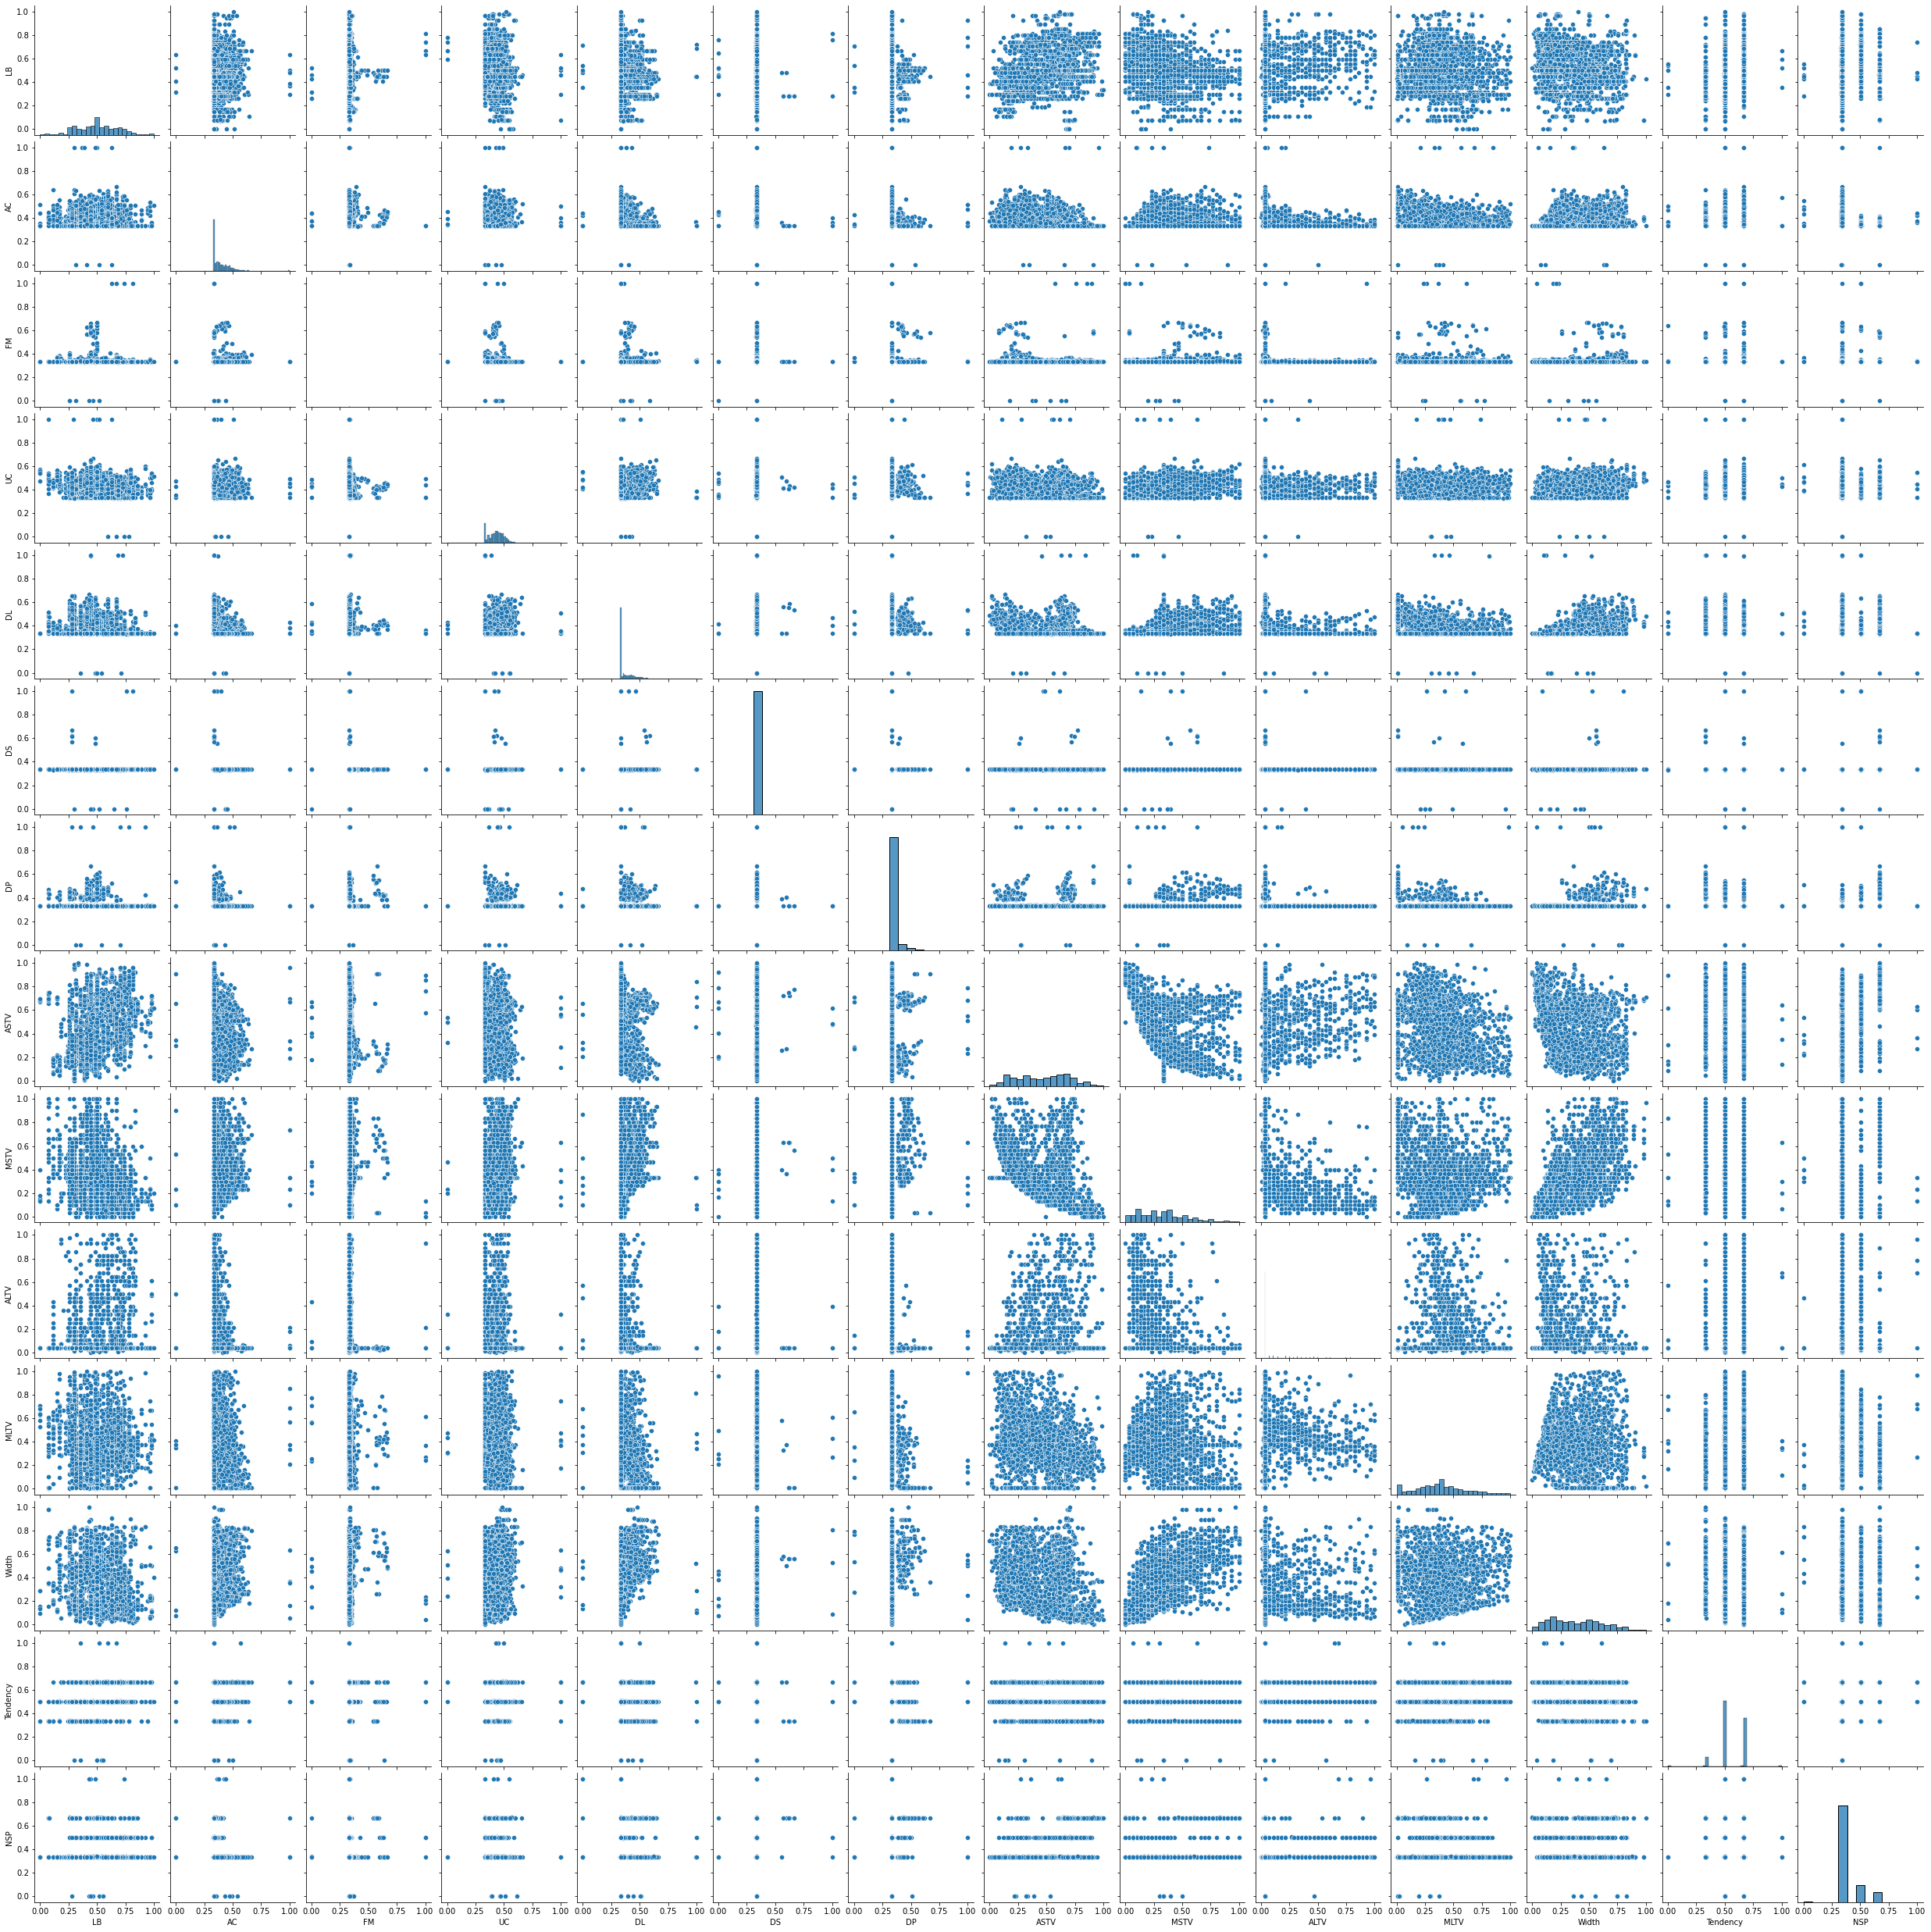

In [53]:
# Pair plots
sns.pairplot(df_normalized)
plt.show()

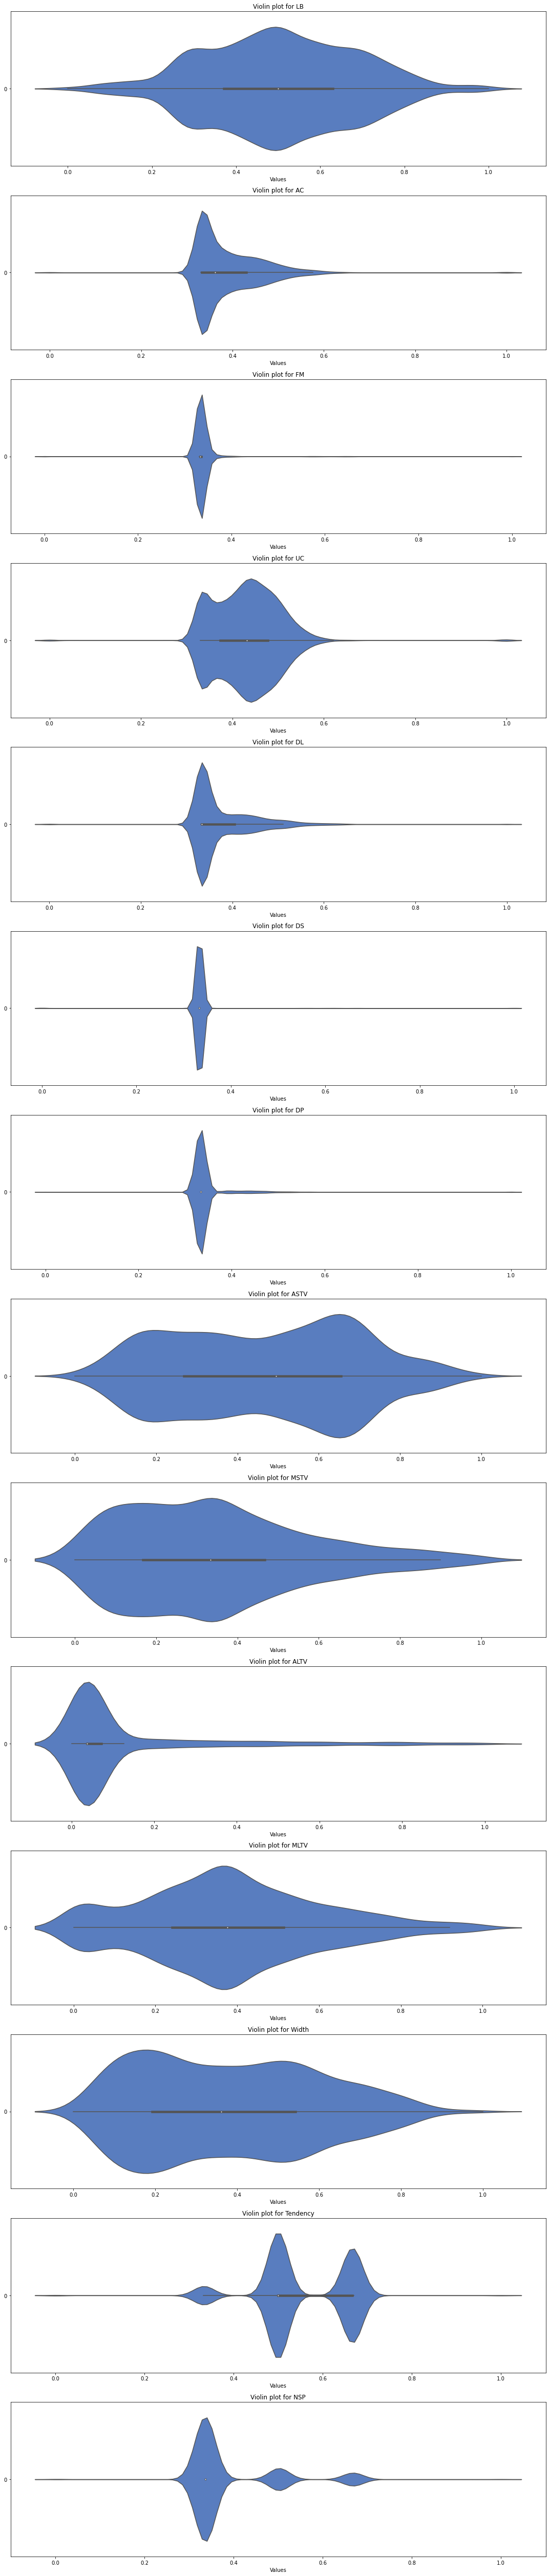

In [64]:
# Violin plots

plt.figure(figsize=(15,5*len(df_normalized.columns)))
for i,col in enumerate(df_normalized.columns,1):
    plt.subplot(len(df_normalized.columns),1,i) # Create a subplot for each plot
    sns.violinplot(data=df_normalized[col],orient='h',palette='muted') #orient=h means horizontal orientation, v means vertical
    plt.title(f'Violin plot for {col}') # palette determines the color pattern in the seaborn plot
    plt.xlabel('Values')
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

In [ ]:
# There is less varience in the columns DP, DS and FM.

# ALTV is right skewed.

In [ ]:
# Speeding up the EDA process
    

In [3]:
# !pip install pandas-profiling

In [4]:
pip install --upgrade pandas pandas-profiling numexpr bottleneck pydantic

Note: you may need to restart the kernel to use updated packages.


In [76]:
!pip install pandas-profiling

  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl.metadata (4.5 kB)
  Using cached ydata_profiling-4.12.1-py2.py3-none-any.whl.metadata (20 kB)
  Using cached pydantic-2.10.5-py3-none-any.whl.metadata (30 kB)


  You can safely remove it manually.
  You can safely remove it manually.
error: uninstall-distutils-installed-package

Cannot uninstall llvmlite 0.38.0

It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


  Using cached phik-0.12.4-cp39-cp39-win_amd64.whl.metadata (5.6 kB)
  Using cached typeguard-4.4.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached wordcloud-1.9.4-cp39-cp39-win_amd64.whl.metadata (3.5 kB)
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
  Using cached numba-0.60.0-cp39-cp39-win_amd64.whl.metadata (2.8 kB)
  Using cached llvmlite-0.43.0-cp39-cp39-win_amd64.whl.metadata (4.9 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
INFO: pip is looking at multiple versions of visions to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of visions[type-image-path] to determine which version is compatible with other requirements. This could take a while.
Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
Using cached ydata_profiling-4.12.1-py2.py3-none-any.whl (390 kB)
Using cac

In [2]:
import pandas_profiling as pp

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.10/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.10/u/import-error

In [78]:
!pip install pandas-profiling
!pip install sweetviz

error: uninstall-distutils-installed-package

Cannot uninstall llvmlite 0.38.0

It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.



  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl.metadata (4.5 kB)
  Using cached ydata_profiling-4.12.1-py2.py3-none-any.whl.metadata (20 kB)
  Using cached pydantic-2.10.5-py3-none-any.whl.metadata (30 kB)
  Using cached phik-0.12.4-cp39-cp39-win_amd64.whl.metadata (5.6 kB)
  Using cached typeguard-4.4.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached wordcloud-1.9.4-cp39-cp39-win_amd64.whl.metadata (3.5 kB)
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
  Using cached numba-0.60.0-cp39-cp39-win_amd64.whl.metadata (2.8 kB)
  Using cached llvmlite-0.43.0-cp39-cp39-win_amd64.whl.metadata (4.9 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
INFO: pip is looking at multiple versions of visions to determine which version is compatible with other requirements. This could take a while.
  Using cached visions-0.7.5-py3-none-any.whl.metadata (6.3 kB)
INFO: pip is lookin

In [79]:
!pip install  -- upgrade visions

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [70]:
!python.exe -m pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


In [71]:
!pip install pandas matplotlib scipy numpy jinja2 missingno htmlmin pandas-profiling

  Using cached htmlmin-0.1.12-py3-none-any.whl


error: uninstall-distutils-installed-package

Cannot uninstall llvmlite 0.38.0

It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


   ---------------------------------------- 2.7/2.7 MB 11.1 MB/s eta 0:00:00
   ---------------------------------------- 666.3/666.3 kB 8.6 MB/s eta 0:00:00
   ---------------------------------------- 28.1/28.1 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0


In [72]:
import pandas_profiling as pp

ModuleNotFoundError: No module named 'pandas_profiling'

In [73]:
!pip install --upgrade pandas_profiling
!pip install --upgrade visions

  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl.metadata (4.5 kB)
  Using cached ydata_profiling-4.12.1-py2.py3-none-any.whl.metadata (20 kB)
  Using cached pydantic-2.10.5-py3-none-any.whl.metadata (30 kB)
  Using cached phik-0.12.4-cp39-cp39-win_amd64.whl.metadata (5.6 kB)

error: uninstall-distutils-installed-package

Cannot uninstall llvmlite 0.38.0

It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.



  Using cached typeguard-4.4.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached wordcloud-1.9.4-cp39-cp39-win_amd64.whl.metadata (3.5 kB)
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
  Using cached numba-0.60.0-cp39-cp39-win_amd64.whl.metadata (2.8 kB)
  Using cached llvmlite-0.43.0-cp39-cp39-win_amd64.whl.metadata (4.9 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
Using cached ydata_profiling-4.12.1-py2.py3-none-any.whl (390 kB)
Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
Using cached numba-0.60.0-cp39-cp39-win_amd64.whl (2.7 MB)
Using cached phik-0.12.4-cp39-cp39-win_amd64.whl (666 kB)
Using cached pydantic-2.10.5-py3-none-any.whl (431 kB)
Using cached typeguard-4.4.1-py3-none-any.whl (35 kB)
Using cached wordcloud-1.9.4-cp39-cp39-win_amd

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 2.0.2 which is incompatible.



   ---------------------------------------- 15.9/15.9 MB 11.0 MB/s eta 0:00:00
   ---------------------------------------- 11.6/11.6 MB 7.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5


In [74]:
EDA_report= pp.ProfileReport(df_normalized)
EDA_report.to_file(output_file='report_check.html')

NameError: name 'pp' is not defined

In [75]:
import sweetviz as sv
sweet_report = sv.analyze(df_normalized)
sweet_report.show_html('report_new.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report_new.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# From the output data it was inferred that the columns DP, DS, DL, FM and NSP had almost constant values.

# Column 'ALTV' had a slightly negative correlation and was right skewed.